In [976]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)


In [977]:
!mkdir -p ~/.kaggle
!cp kaggle-2.json ~/.kaggle/

cp: cannot stat 'kaggle-2.json': No such file or directory


In [978]:
! kaggle datasets download -d "minatverma/nse-stocks-data"

Dataset URL: https://www.kaggle.com/datasets/minatverma/nse-stocks-data
License(s): CC0-1.0
nse-stocks-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [979]:
import zipfile
zip_ref = zipfile.ZipFile('/content/nse-stocks-data.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [981]:
df=pd.read_csv('/content/FINAL_FROM_DF.csv')
df

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846399,ZOTA,SM,221.00,221.00,214.00,217.00,217.00,220.00,14000,3041550.00,2017-12-29,14,INE358U01012
846400,ZUARI,EQ,562.00,562.00,549.55,550.80,552.00,556.80,105184,58163061.60,2017-12-29,2218,INE840M01016
846401,ZUARIGLOB,EQ,255.50,258.40,252.50,253.25,253.00,254.10,90067,22968100.60,2017-12-29,2001,INE217A01012
846402,ZYDUSWELL,EQ,1038.00,1068.00,1033.00,1043.20,1035.00,1023.10,28601,29938840.10,2017-12-29,1401,INE768C01010


In [982]:

df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

In [983]:
selected_company = 'HDFCBANK'  # Replace with the actual company name
df = df[(df['SYMBOL'] == selected_company) & (df['SERIES'] == 'EQ')]

In [984]:
df = df.sort_values(by='TIMESTAMP', ascending=True)
df.set_index('TIMESTAMP', inplace=True)

In [985]:
df

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN
TIMESTAMP,,,,,,,,,,,,
2016-01-01,HDFCBANK,EQ,1082.40,1090.25,1076.15,1088.75,1088.70,1082.15,798769,8.678170e+08,11330,INE040A01026
2016-01-04,HDFCBANK,EQ,1084.00,1084.00,1068.10,1070.50,1068.50,1088.75,1296884,1.391887e+09,29955,INE040A01026
2016-01-05,HDFCBANK,EQ,1070.20,1074.80,1061.35,1062.40,1062.00,1070.50,790218,8.424603e+08,14980,INE040A01026
2016-01-06,HDFCBANK,EQ,1056.65,1076.75,1056.65,1067.10,1067.55,1062.40,1041384,1.113136e+09,18189,INE040A01026
2016-01-07,HDFCBANK,EQ,1060.10,1064.90,1049.70,1056.20,1052.55,1067.10,1513857,1.601665e+09,27942,INE040A01026
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,HDFCBANK,EQ,1879.00,1880.00,1861.75,1876.65,1874.65,1868.30,1117726,2.090554e+09,46791,INE040A01026
2017-12-26,HDFCBANK,EQ,1881.00,1882.80,1856.70,1868.35,1870.00,1876.65,1696424,3.168235e+09,23017,INE040A01026
2017-12-27,HDFCBANK,EQ,1870.10,1870.30,1851.15,1856.75,1852.50,1868.35,872346,1.625968e+09,21881,INE040A01026


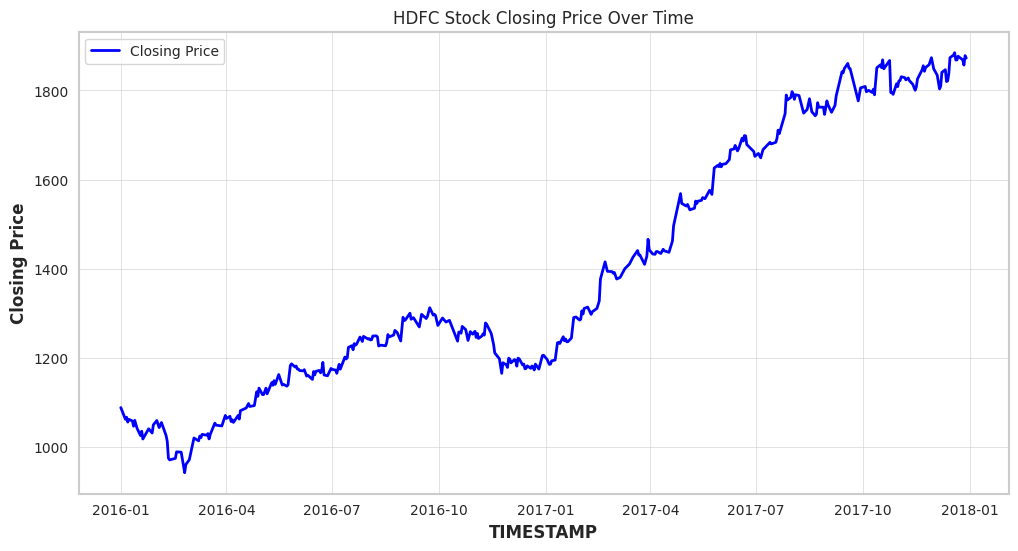

In [986]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CLOSE'], label='Closing Price', color='blue')
plt.title("HDFC Stock Closing Price Over Time")
plt.xlabel("TIMESTAMP")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

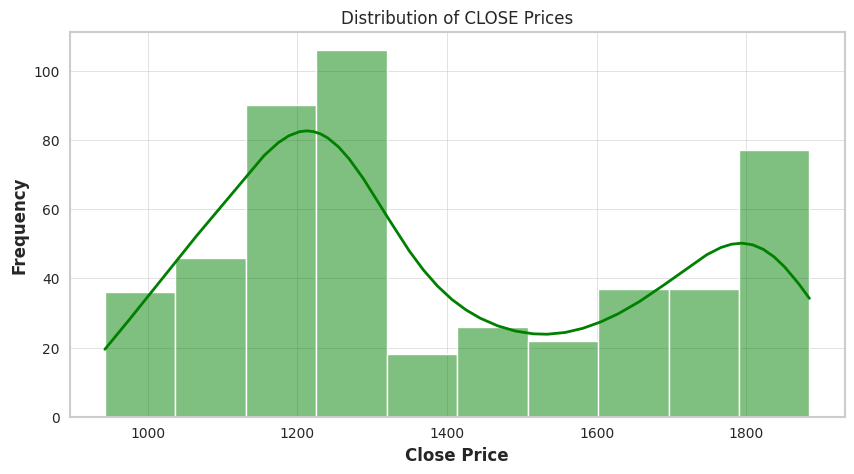

In [987]:
# Plot the distribution of CLOSE prices
plt.figure(figsize=(10, 5))
sns.histplot(df['CLOSE'], kde=True, color='green')
plt.title("Distribution of CLOSE Prices")
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

In [988]:
# Create new features
df['PRICE_CHANGE'] = (df['CLOSE'] - df['PREVCLOSE']) / df['PREVCLOSE'] * 100
df['PRICE_CHANGE']

,PRICE_CHANGE
TIMESTAMP,
2016-01-01,0.609897
2016-01-04,-1.676234
2016-01-05,-0.756656
2016-01-06,0.442395
2016-01-07,-1.021460
...,...
2017-12-22,0.446930
2017-12-26,-0.442277
2017-12-27,-0.620869


In [989]:
df['PRICE_RANGE'] = df['HIGH'] - df['LOW']
df['PRICE_RANGE']

,PRICE_RANGE
TIMESTAMP,
2016-01-01,14.10
2016-01-04,15.90
2016-01-05,13.45
2016-01-06,20.10
2016-01-07,15.20
...,...
2017-12-22,18.25
2017-12-26,26.10
2017-12-27,19.15


In [990]:
df['AVGTRDVAL'] = df['TOTTRDVAL'] / df['TOTTRDQTY']
df['AVGTRDVAL']

,AVGTRDVAL
TIMESTAMP,
2016-01-01,1086.443041
2016-01-04,1073.255088
2016-01-05,1066.111313
2016-01-06,1068.900334
2016-01-07,1058.003019
...,...
2017-12-22,1870.363135
2017-12-26,1867.596353
2017-12-27,1863.902603


In [991]:
df['MA5'] = df['CLOSE'].rolling(window=5).mean()
df['MA5']

,MA5
TIMESTAMP,
2016-01-01,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,1068.99
...,...
2017-12-22,1875.31
2017-12-26,1873.19
2017-12-27,1867.64


In [992]:
df['VOLATILITY'] = df['CLOSE'].rolling(window=5).std()
df['VOLATILITY']

,VOLATILITY
TIMESTAMP,
2016-01-01,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,12.281307
...,...
2017-12-22,7.069424
2017-12-26,7.290868
2017-12-27,7.088230


In [993]:
print(df.isnull().sum())

SYMBOL          0
SERIES          0
OPEN            0
HIGH            0
LOW             0
CLOSE           0
LAST            0
PREVCLOSE       0
TOTTRDQTY       0
TOTTRDVAL       0
TOTALTRADES     0
ISIN            0
PRICE_CHANGE    0
PRICE_RANGE     0
AVGTRDVAL       0
MA5             4
VOLATILITY      4
dtype: int64


In [994]:
df['MA5'] = df['MA5'].fillna(method='bfill')  # backword fill
df['VOLATILITY'] = df['VOLATILITY'].fillna(method='bfill')  # backword fill

In [995]:
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN,PRICE_CHANGE,PRICE_RANGE,AVGTRDVAL,MA5,VOLATILITY
TIMESTAMP,,,,,,,,,,,,,,,,,
2016-01-01,HDFCBANK,EQ,1082.40,1090.25,1076.15,1088.75,1088.70,1082.15,798769,8.678170e+08,11330,INE040A01026,0.609897,14.10,1086.443041,1068.99,12.281307
2016-01-04,HDFCBANK,EQ,1084.00,1084.00,1068.10,1070.50,1068.50,1088.75,1296884,1.391887e+09,29955,INE040A01026,-1.676234,15.90,1073.255088,1068.99,12.281307
2016-01-05,HDFCBANK,EQ,1070.20,1074.80,1061.35,1062.40,1062.00,1070.50,790218,8.424603e+08,14980,INE040A01026,-0.756656,13.45,1066.111313,1068.99,12.281307
2016-01-06,HDFCBANK,EQ,1056.65,1076.75,1056.65,1067.10,1067.55,1062.40,1041384,1.113136e+09,18189,INE040A01026,0.442395,20.10,1068.900334,1068.99,12.281307
2016-01-07,HDFCBANK,EQ,1060.10,1064.90,1049.70,1056.20,1052.55,1067.10,1513857,1.601665e+09,27942,INE040A01026,-1.021460,15.20,1058.003019,1068.99,12.281307


In [996]:
df = df.drop(['SYMBOL', 'SERIES', 'ISIN'], axis=1)

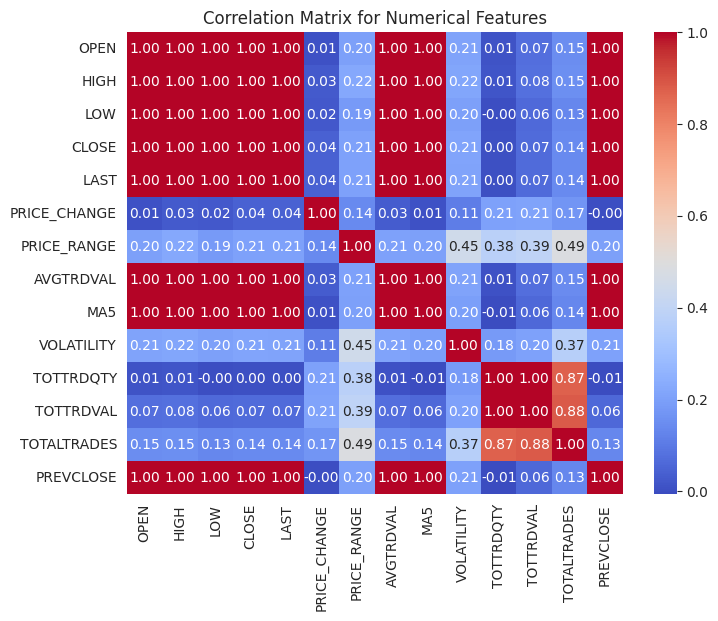

In [997]:
import seaborn as sns

# Correlation heatmap
# Remove 'ISIN' and 'TIMESTAMP' from numerical_columns as they are not numerical
# Updated numerical_columns to exclude 'ISIN' and 'TIMESTAMP'
numerical_columns = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'LAST', 'PRICE_CHANGE',
                     'PRICE_RANGE', 'AVGTRDVAL', 'MA5', 'VOLATILITY',
                     'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES', 'PREVCLOSE']

plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [998]:

df= df[['CLOSE']]

In [999]:
train_data = df.iloc[:int(0.8 * len(df))]
test_data = df.iloc[int(0.8 * len(df)):]


In [1001]:
df

,CLOSE
TIMESTAMP,
2016-01-01,1088.75
2016-01-04,1070.50
2016-01-05,1062.40
2016-01-06,1067.10
2016-01-07,1056.20
...,...
2017-12-22,1876.65
2017-12-26,1868.35
2017-12-27,1856.75


In [1002]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)


In [1003]:

# Function to create sequences
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i])
        y.append(data[i, 0])  # Assuming target is in the first column
    return np.array(X), np.array(y)

# Create sequences for training and testing
window_size = 60
X_train, y_train = create_sequences(scaled_train, window_size)
X_test, y_test = create_sequences(scaled_test, window_size)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], -1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], -1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(336, 60, 1) (39, 60, 1)
(336,) (39,)


In [1004]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import HeNormal
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
import tensorflow as tf



In [1005]:

model = Sequential()

model.add(LSTM(units=100, return_sequences=True,
               input_shape=(X_train.shape[1], X_train.shape[2]),
               kernel_initializer=HeNormal()))

model.add(LSTM(units=100, return_sequences=False,
               kernel_initializer=HeNormal()))

model.add(Dropout(0.4))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                       │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_50 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [1006]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=1)


Epoch 1/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1782 - val_loss: 0.0184
Epoch 2/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0186 - val_loss: 0.0025
Epoch 3/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0074 - val_loss: 0.0053
Epoch 4/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0059 - val_loss: 0.0029
Epoch 5/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0065 - val_loss: 0.0339
Epoch 6/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0055 - val_loss: 6.8553e-04
Epoch 7/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0043 - val_loss: 0.0111
Epoch 8/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 9/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 10/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0037 - val_loss: 7.0736e-04
Epoch 11/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0033 - val_loss: 0.0151
Epoch 12/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [1008]:

predicted_price = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [1009]:
predicted_price = scaler.inverse_transform(np.concatenate((predicted_price, np.zeros((predicted_price.shape[0], scaled_train.shape[1] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_train.shape[1] - 1))), axis=1))[:, 0]


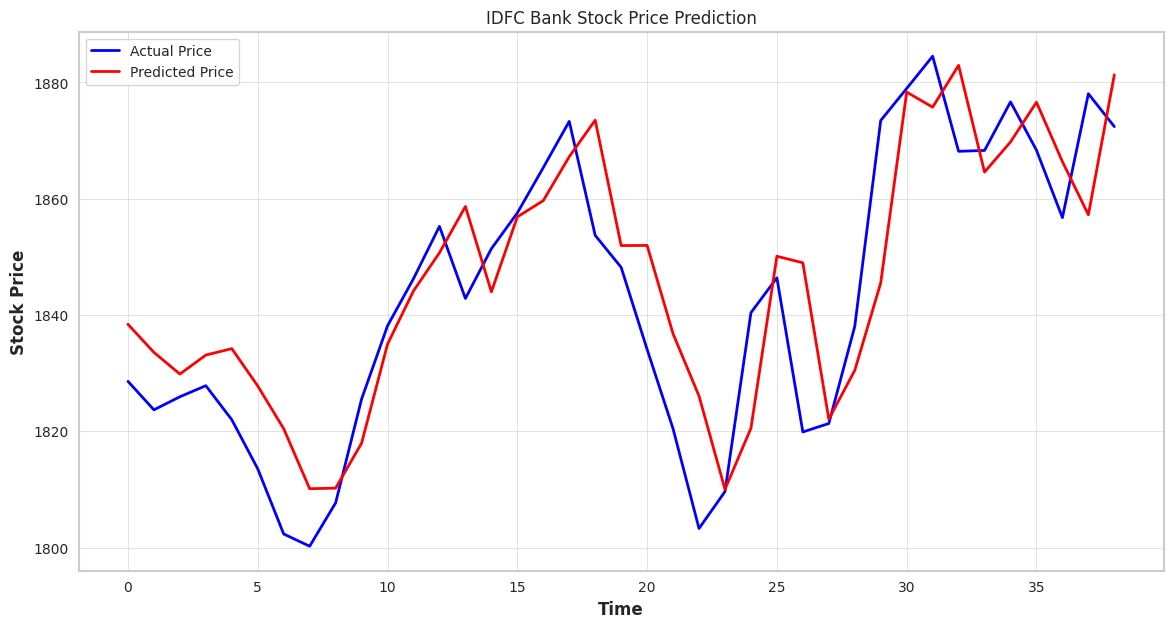

In [1010]:

plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(predicted_price, color='red', label='Predicted Price')
plt.title('IDFC Bank Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [1011]:

rmse = math.sqrt(mean_squared_error(y_test_actual, predicted_price))
mae = mean_absolute_error(y_test_actual, predicted_price)
train_predicted_price = model.predict(X_train)
train_predicted_price = scaler.inverse_transform(np.concatenate((train_predicted_price, np.zeros((train_predicted_price.shape[0], scaled_train.shape[1] - 1))), axis=1))[:, 0]
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], scaled_train.shape[1] - 1))), axis=1))[:, 0]
train_r2 = r2_score(y_train_actual, train_predicted_price)
test_r2 = r2_score(y_test_actual, predicted_price)


print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f"R² score for Training Data: {train_r2}")
print(f"R² score for Test Data: {test_r2}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RMSE: 12.526971612118428
MAE: 10.026161661514887
R² score for Training Data: 0.9934700969591223
R² score for Test Data: 0.7345475279338967


In [1012]:
future_days = 30
current_input = scaled_test[-window_size:].copy()

predicted_future_prices = []

for day in range(future_days):
    # Predict next price
    predicted_next = model.predict(current_input.reshape(1, window_size, -1))

    # Append the predicted price
    predicted_future_prices.append(predicted_next[0, 0])

    # Prepare input for the next prediction
    next_input = np.zeros((1, scaled_test.shape[1]))
    next_input[0, 0] = predicted_next  # Update the target value
    current_input = np.vstack([current_input[1:], next_input])  # Slide the window

# Generate future dates
last_date = test_data.index[-1]
future_dates = pd.date_range(last_date, periods=future_days + 1, freq='B')[1:]

# Inverse transform to get actual prices
predicted_future_prices_actual = scaler.inverse_transform(
    np.hstack((np.array(predicted_future_prices).reshape(-1, 1),
               np.zeros((len(predicted_future_prices), scaled_test.shape[1] - 1)))
    )
)[:, 0]

# Retrieve past 60 days prices for visualization
past_prices_actual = scaler.inverse_transform(scaled_test[-window_size:])[:, 0]
past_dates = test_data.index[-window_size:]

# Combine past and future dates and prices
all_dates = np.concatenate([past_dates, future_dates])
all_prices = np.concatenate([past_prices_actual, predicted_future_prices_actual])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

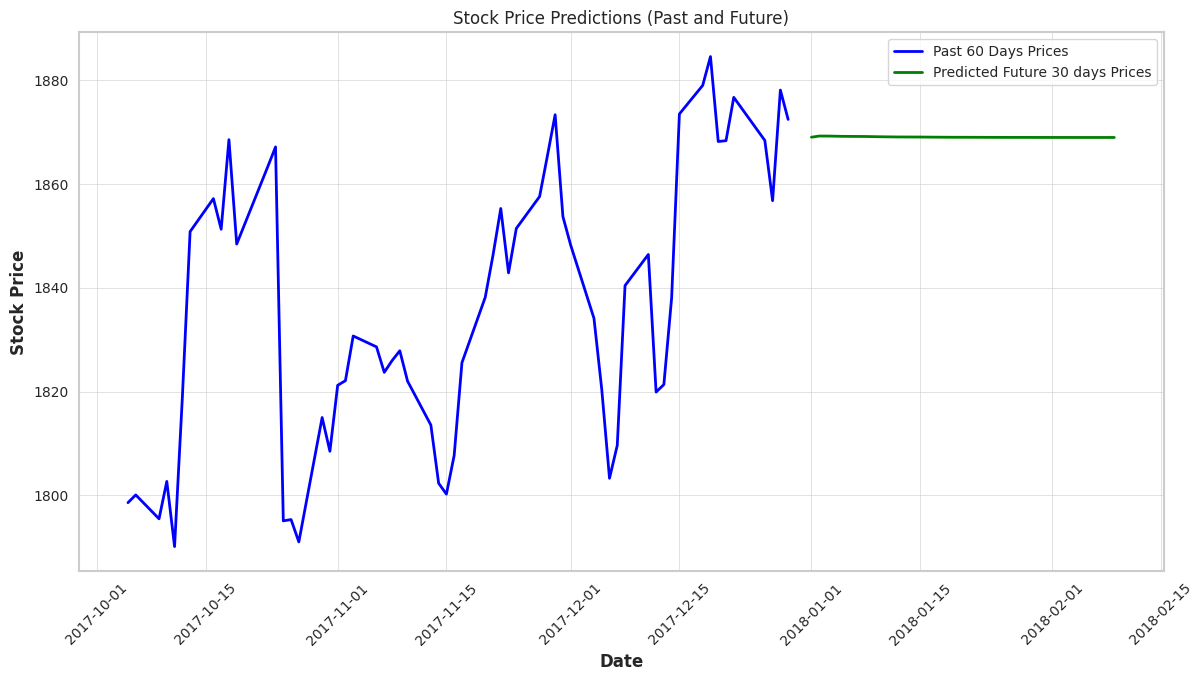

In [1013]:
plt.figure(figsize=(14, 7))
plt.plot(past_dates, past_60_days_prices_actual, color='blue', label='Past 60 Days Prices')
plt.plot(future_dates, predicted_future_prices_actual, color='green', label='Predicted Future 30 days Prices')
plt.title('Stock Price Predictions (Past and Future)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

